In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [5]:
#upload file into dataframe

INPUT="./input"
df_master=pd.read_csv(os.path.join(INPUT,'train.csv'))
df=df_master.copy()
print(df.head(5))
print(df.info())
print(df.shape)
print(df.describe())

  state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62  

In [6]:
#Churn ratio in dataframe
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio =  pd.DataFrame(a).T 
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio

,Not Churn,Churn
churn,0.86,0.14


In [7]:
#Check if exist null value in dataframe
print(df.isna().sum().sort_values(ascending = False))

state                            0
account_length                   0
number_customer_service_calls    0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_night_minutes              0
total_eve_charge                 0
total_eve_calls                  0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
area_code                        0
churn                            0
dtype: int64


In [8]:
#Check duplicated values in dataframe
print('duplicate values in df' ,df.duplicated().sum() )
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
print('duplicate dropped')

duplicate values in df 0
duplicate dropped


In [9]:
#Split columns to 2 types
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col)
categ_columns.append('state')
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn', 'state']
nums numericals columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


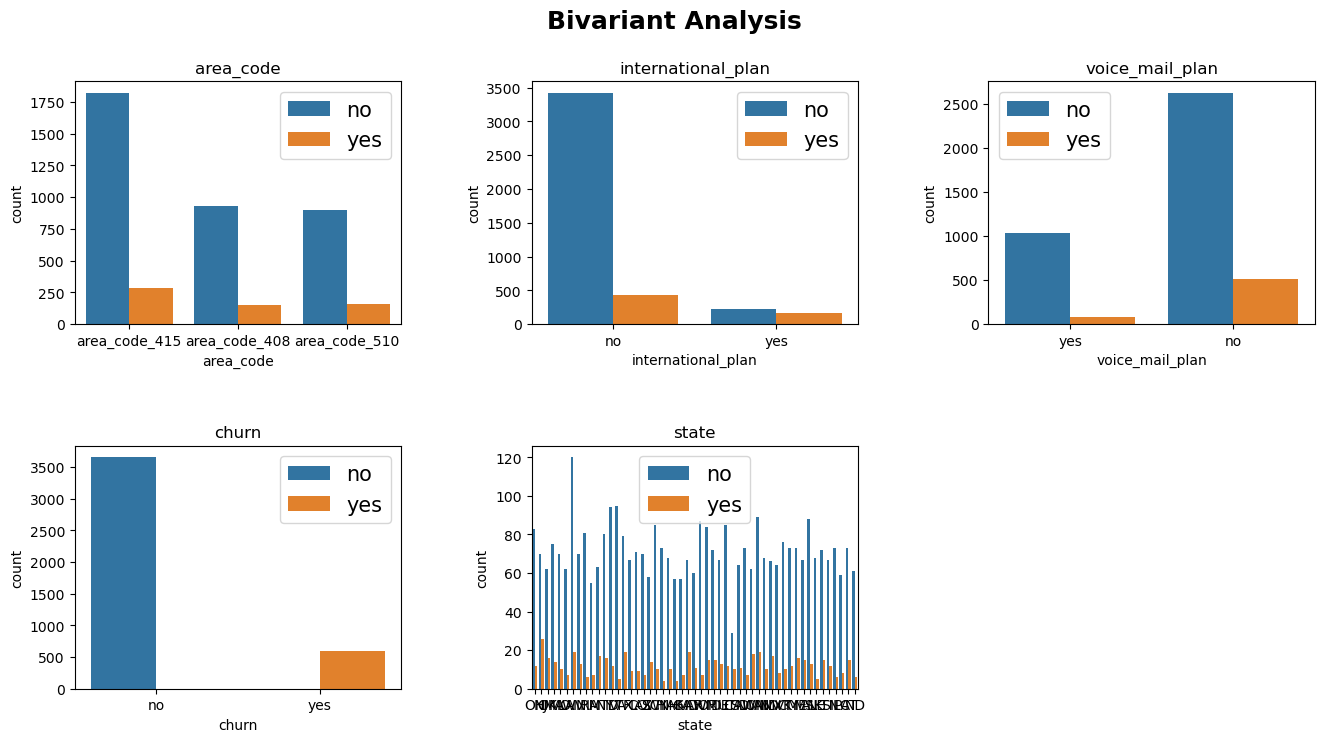

In [10]:
#Exploratory data analysis
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col)
    a.legend(fontsize=15)

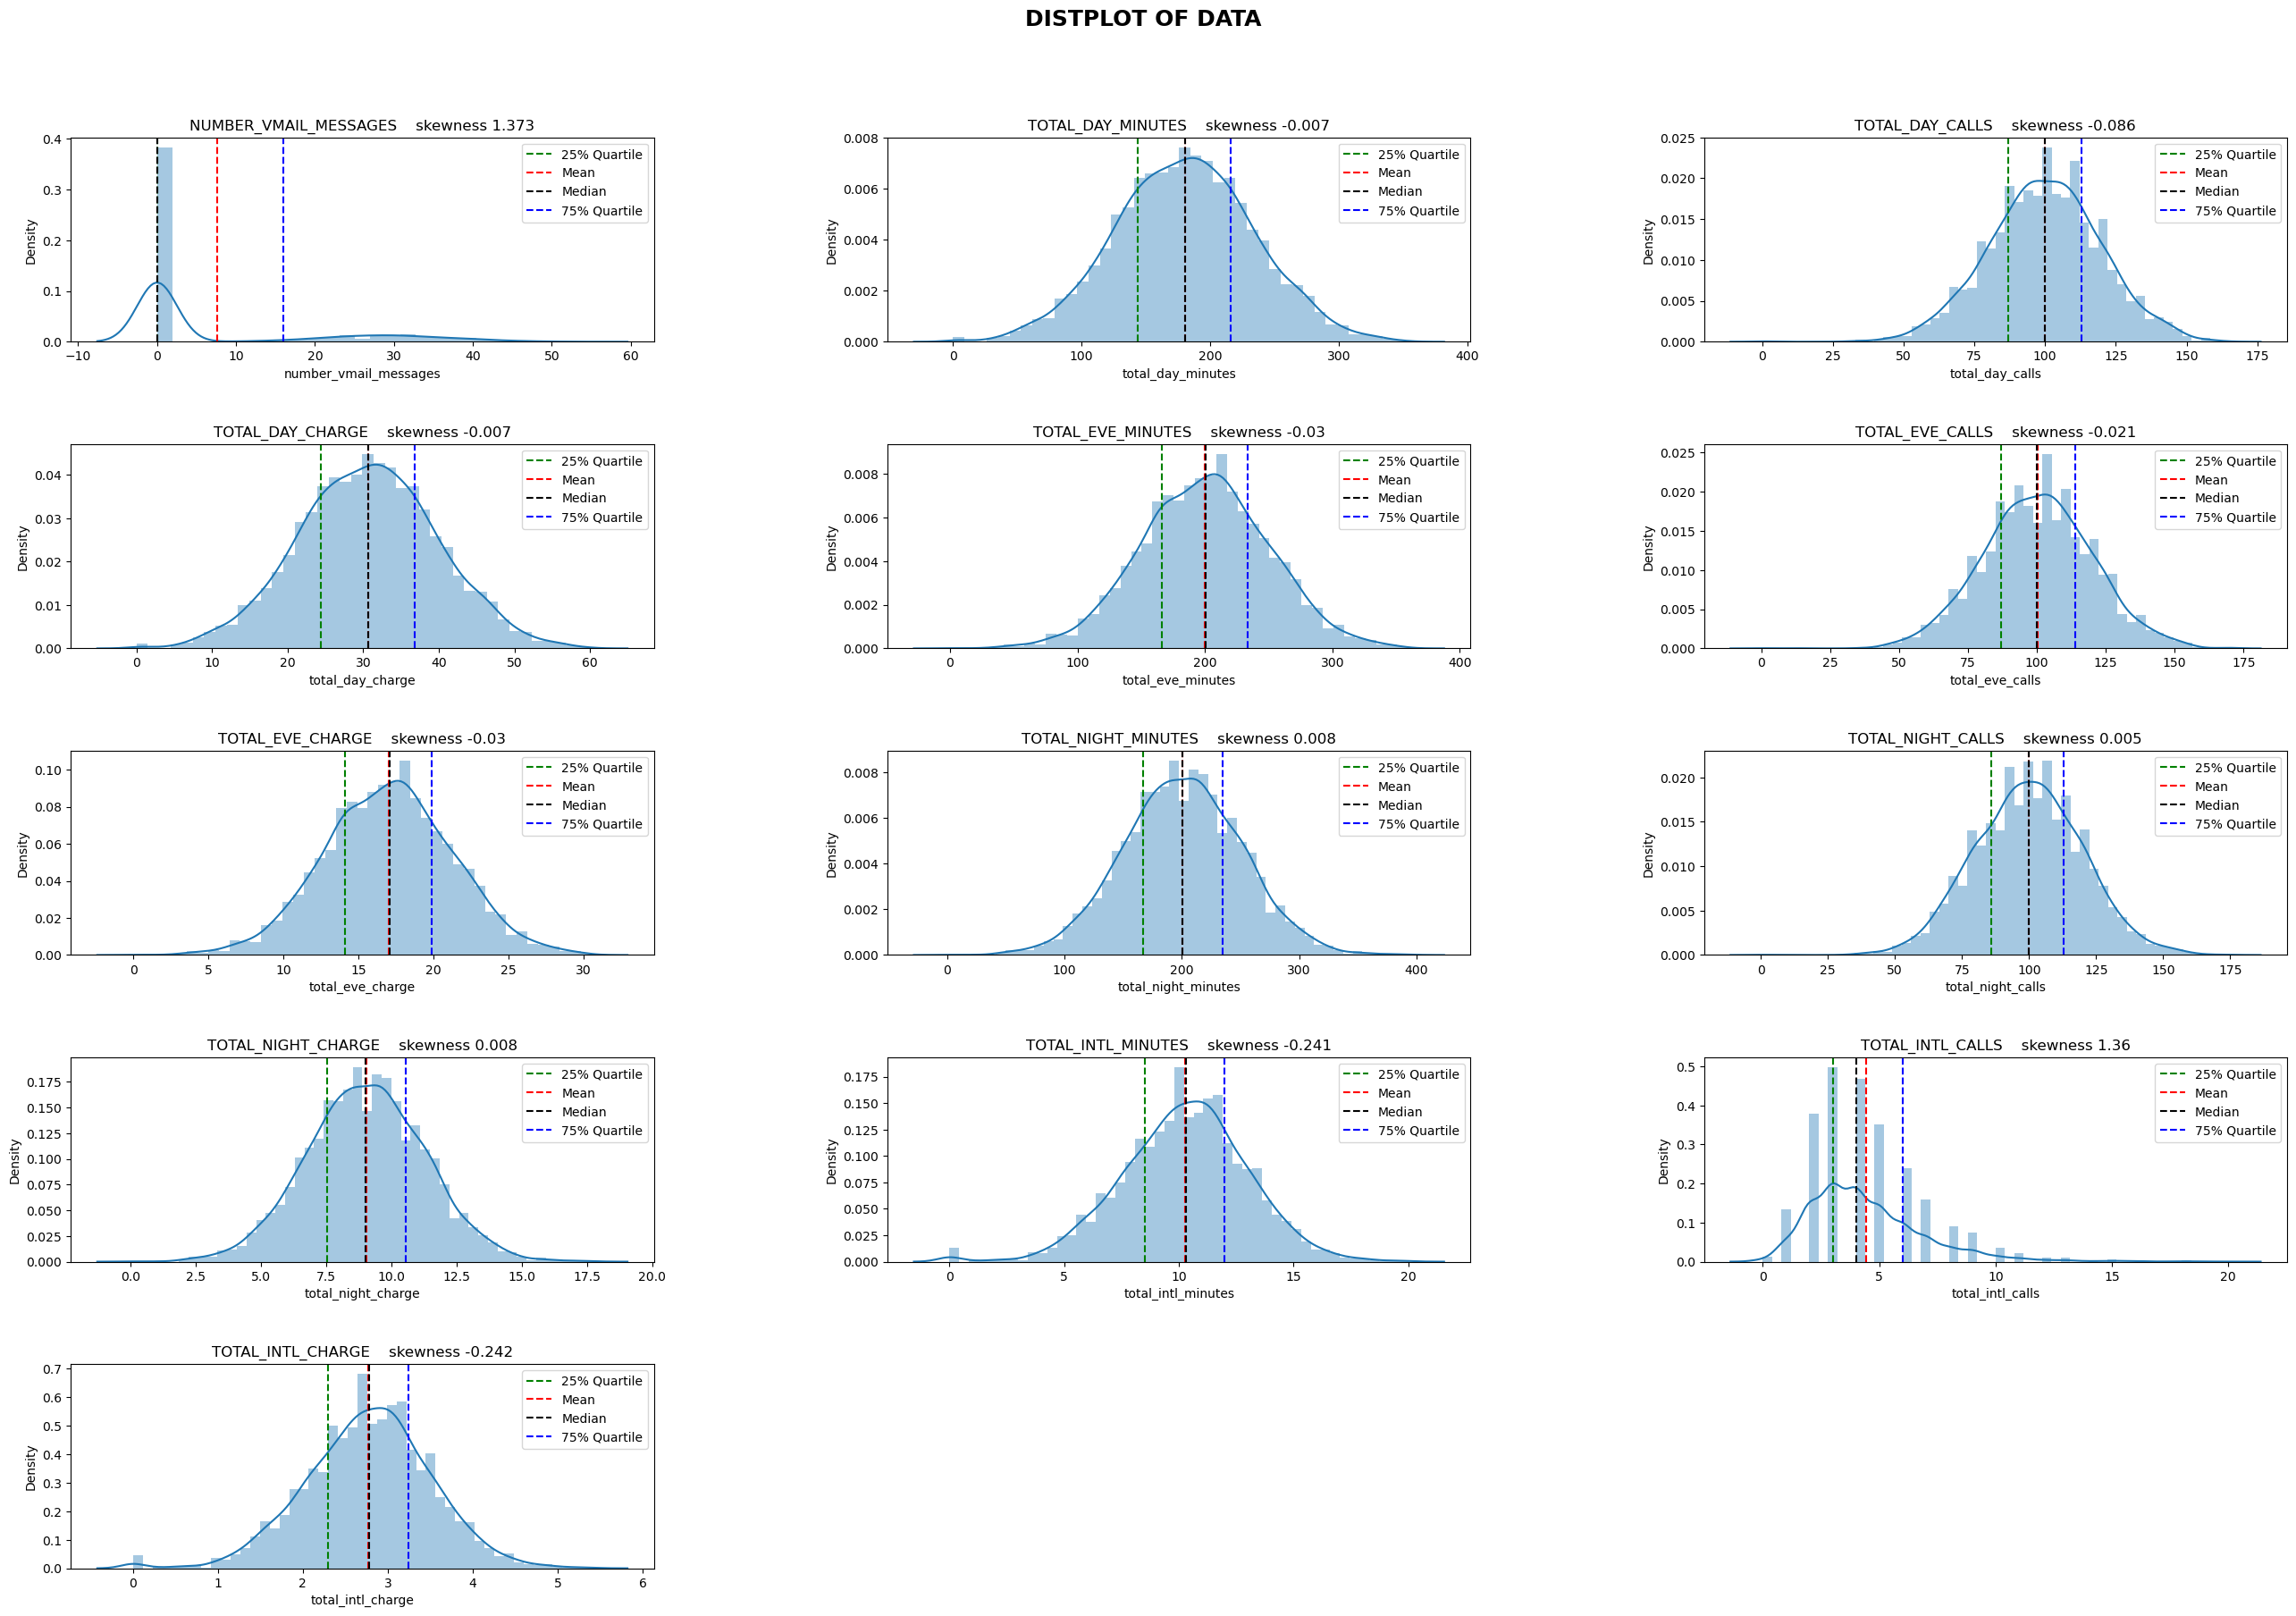

In [11]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10) 

In [12]:
#Outliers detection
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

number_vmail_messages    True
total_day_minutes        True
total_day_calls          True
total_day_charge         True
total_eve_minutes        True
total_eve_calls          True
total_eve_charge         True
total_night_minutes      True
total_night_calls        True
total_night_charge       True
total_intl_minutes       True
total_intl_calls         True
total_intl_charge        True
dtype: bool

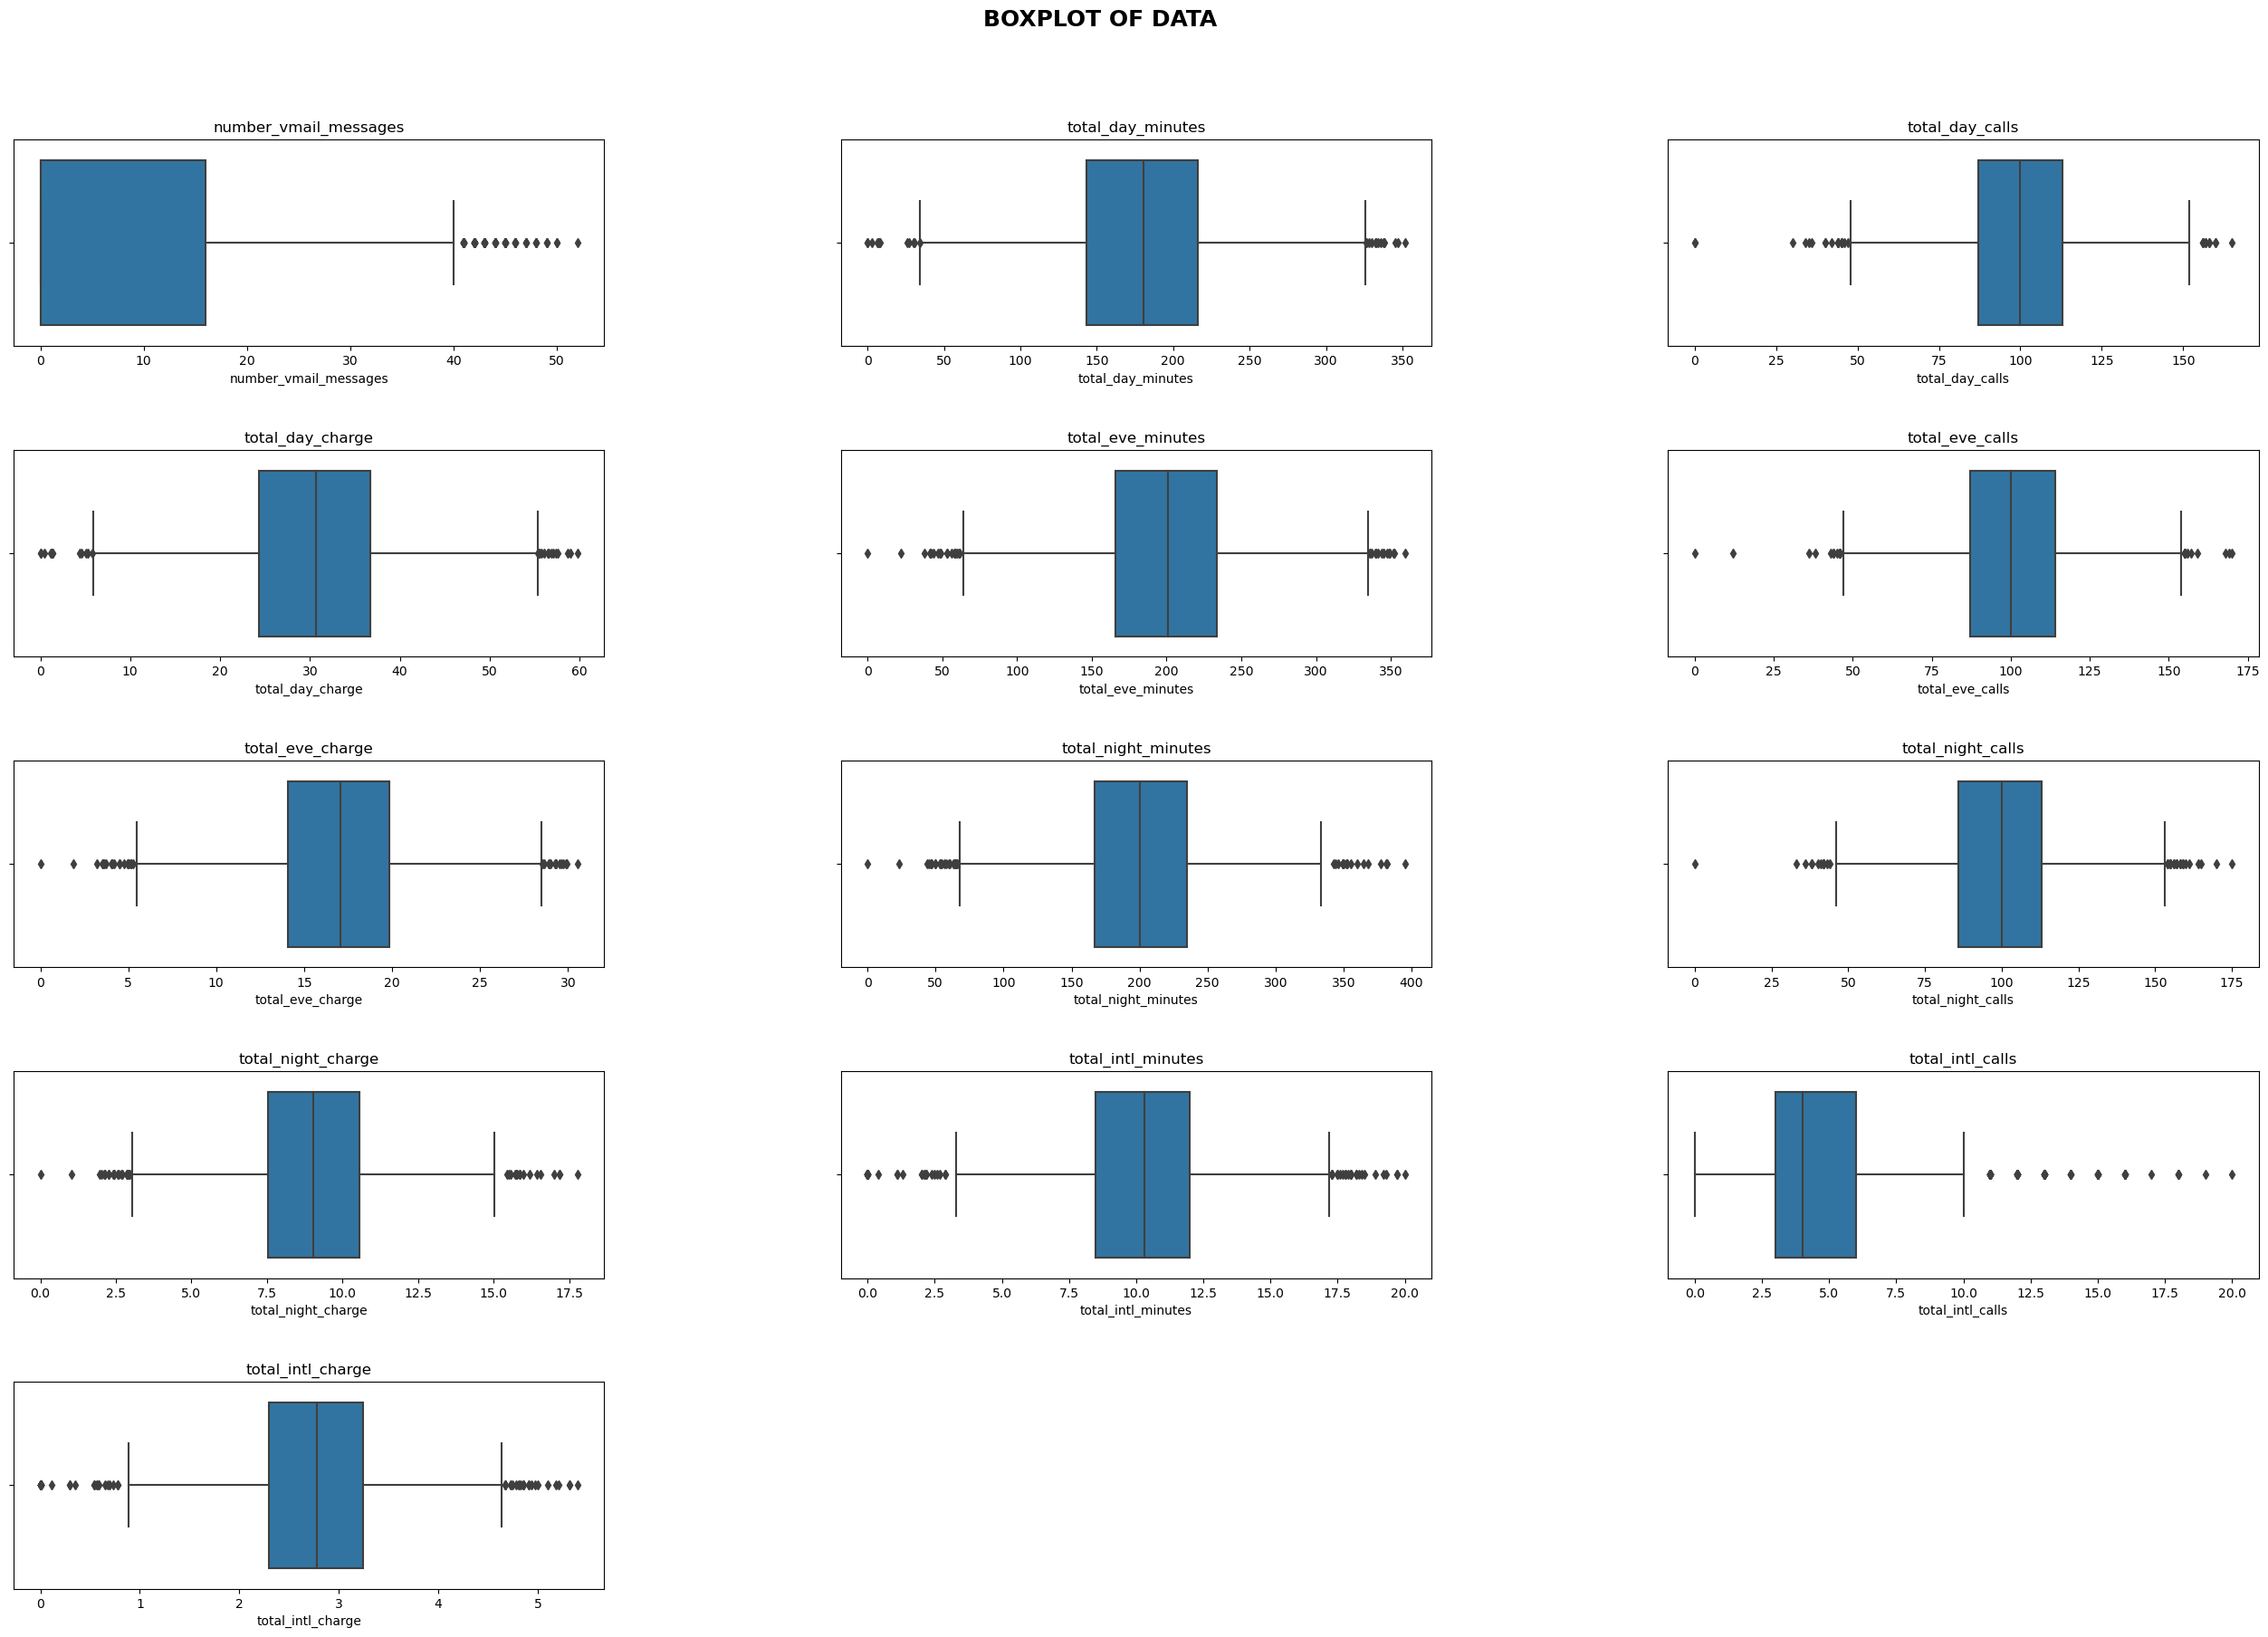

In [13]:
#Data visualization of num columns before treating Outliers
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col);
    
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [14]:
#Treating Outliers
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

for col in Num_cols:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

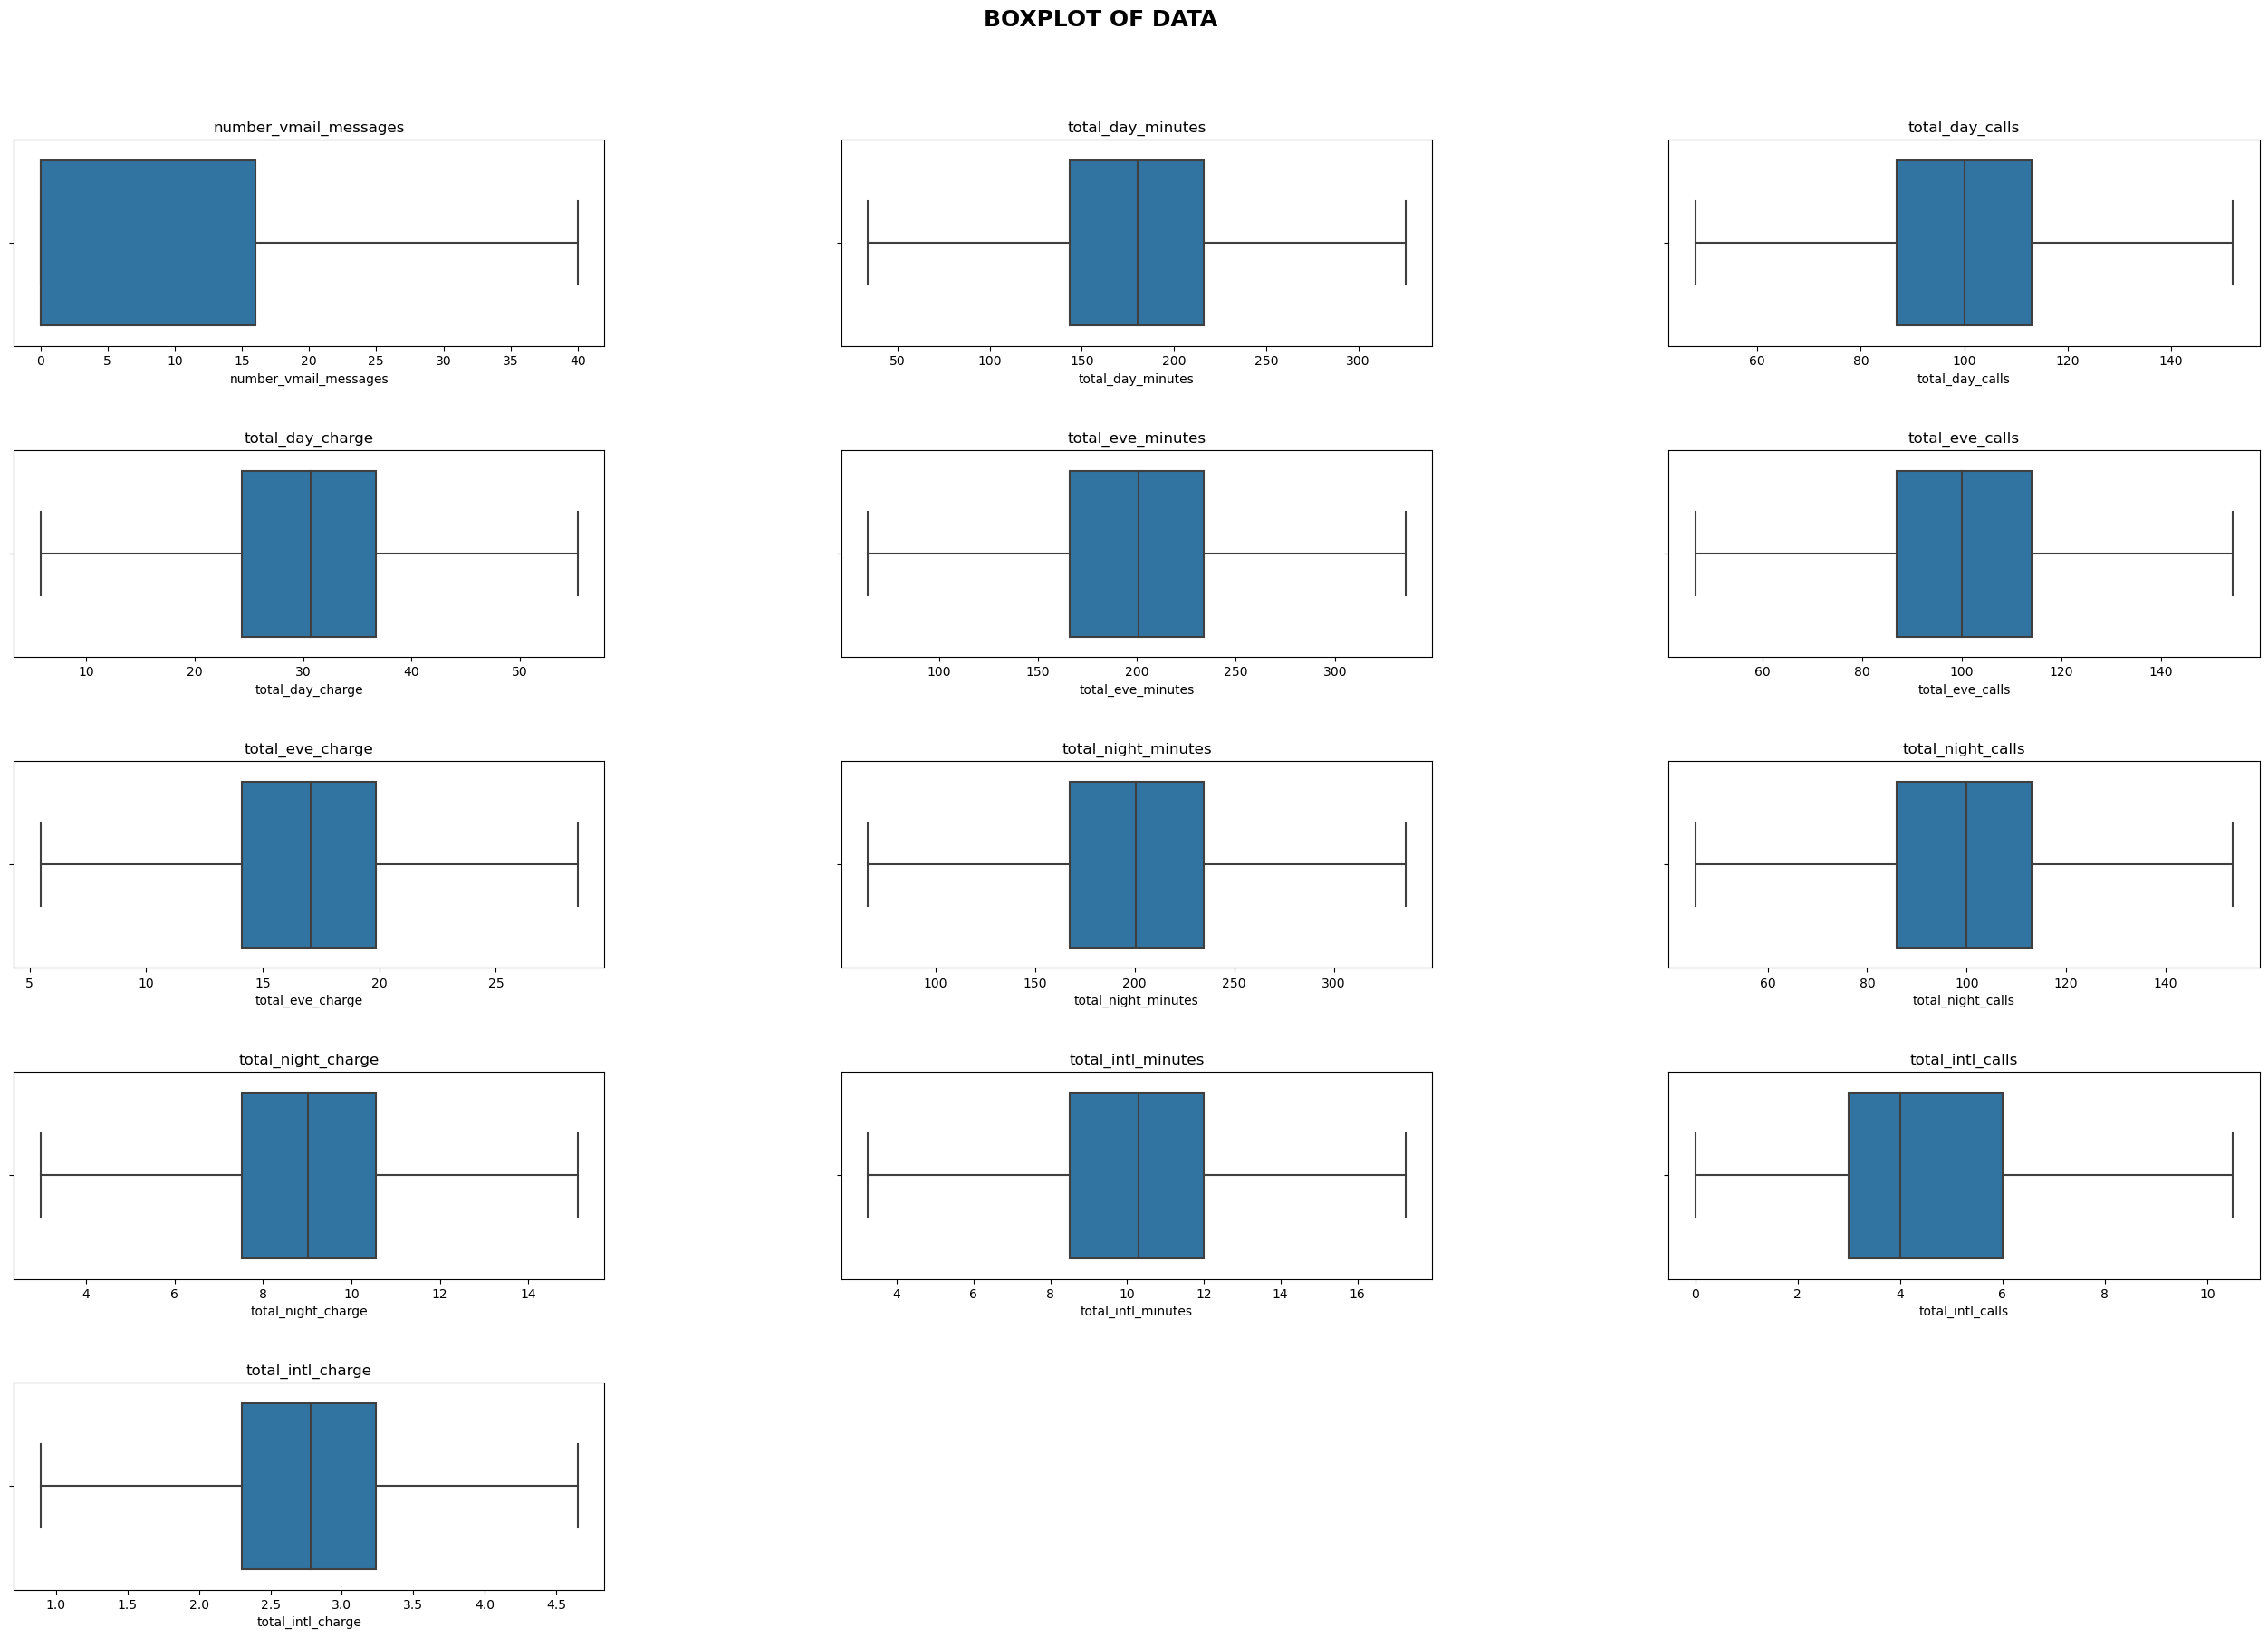

In [15]:
#Data visualization after treating Outliers
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col);
    
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [16]:
#Feature Engineering of dataframe

df.drop(columns=['account_length'], axis=1, inplace=True)

df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

# df.drop(columns= ['state', 'area_code'], inplace= True)
df.area_code = pd.Categorical(df.area_code).codes
df.state=pd.Categorical(df.state).codes

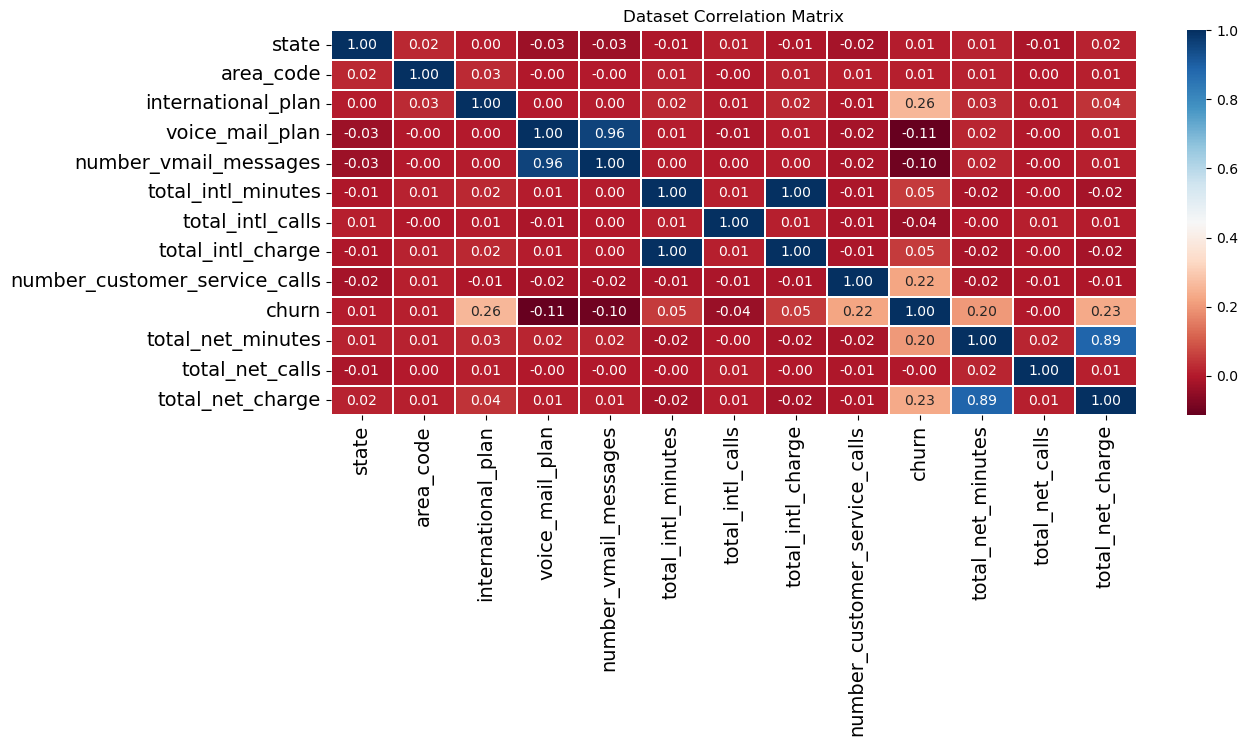

In [17]:
#Plot Correlation Matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
# Split data set to training set and validation set

X = df.drop('churn' , 1 )
y = df['churn'] 
X_train , X_val , y_train , y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 
cross_val_score_list = []
auc_list = []

def Model_features(X_train, y_train, X_test, y_test, y_pred, classifier, model_name):
    accuracy = round(accuracy_score(y_test , y_pred) , 4)
    precision = round(precision_score(y_test, y_pred, average="binary")  ,4)
    recall = round(recall_score(y_test , y_pred) ,4)
    f1_s = round(f1_score(y_test , y_pred) , 4)
    c_val_score = round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 4)
    y_pred_proba=classifier.predict_proba(X_test)[::,1]
    auc = round(roc_auc_score(y_test, y_pred_proba), 4)
    print("Accuracy: {:.2f}%".format(accuracy*100)+" "*3+"Precision Score: {:.4f}".format(precision)+" "*3+"Recall Score: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1_s)+" "*3+"Cross Val Score: {:.4f}".format(c_val_score)+" "*3+"AUC: {:.4f}".format(auc))
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)
    auc_list.append(auc)

    target_names = ['Not Churn', 'Churn']
    print(classification_report(y_test, y_pred, target_names=target_names))

    # disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues)
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    # disp.ax_.set_title('Confusion matrix of ' + model_name + ' model')
    # plt.show()
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion matrix of ' + model_name + ' model')
    plt.show()


In [21]:
#Logistic Regression model

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_val)

Accuracy: 84.47%   Precision Score: 0.4400   Recall Score: 0.0853
F1 Score: 0.1429   Cross Val Score: 0.8595   AUC: 0.7370
              precision    recall  f1-score   support

   Not Churn       0.86      0.98      0.91       721
       Churn       0.44      0.09      0.14       129

    accuracy                           0.84       850
   macro avg       0.65      0.53      0.53       850
weighted avg       0.79      0.84      0.80       850



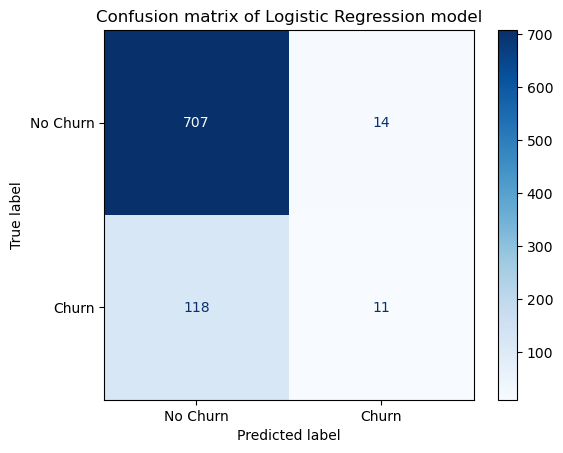

In [22]:
#Confusion matrix of Logistic Regression

Model_features(X_train, y_train, X_val, y_val, y_pred_logreg, logreg, "Logistic Regression")

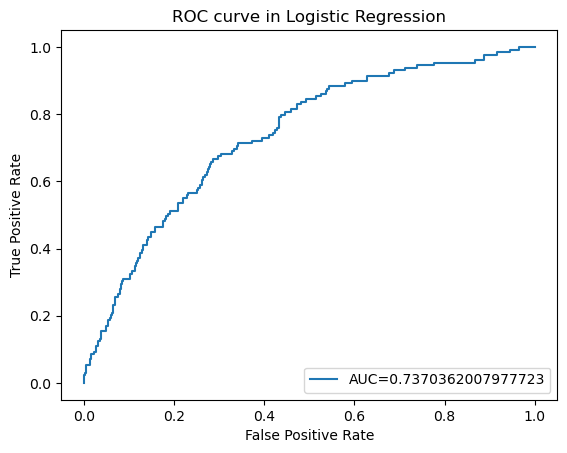

In [23]:
#predict probability of y
y_pred_logreg_proba = logreg.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_logreg_proba)
auc = roc_auc_score(y_val, y_pred_logreg_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC curve in Logistic Regression")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [24]:
# Support Vector Machine model

svm = SVC(kernel='rbf', probability=True, C=1000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

Accuracy: 88.82%   Precision Score: 0.9722   Recall Score: 0.2713
F1 Score: 0.4242   Cross Val Score: 0.8969   AUC: 0.8606
              precision    recall  f1-score   support

   Not Churn       0.88      1.00      0.94       721
       Churn       0.97      0.27      0.42       129

    accuracy                           0.89       850
   macro avg       0.93      0.63      0.68       850
weighted avg       0.90      0.89      0.86       850



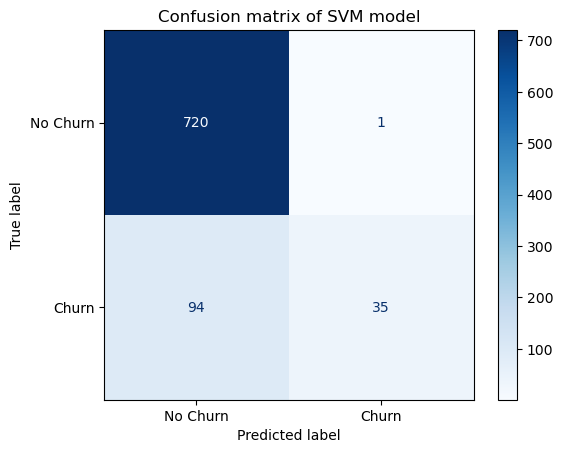

In [25]:
#Confusion matrix of SVM
Model_features(X_train, y_train, X_val, y_val, y_pred_svm, svm, "SVM")

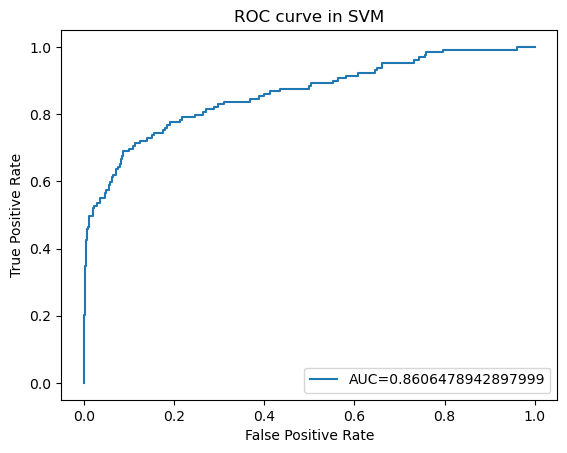

In [26]:
#predict probability of y
y_pred_svm_proba = svm.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_svm_proba)
auc = roc_auc_score(y_val, y_pred_svm_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC curve in SVM")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [27]:
# Random Forest model

rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_val)

Accuracy: 97.53%   Precision Score: 0.9655   Recall Score: 0.8682
F1 Score: 0.9143   Cross Val Score: 0.9736   AUC: 0.9293
              precision    recall  f1-score   support

   Not Churn       0.98      0.99      0.99       721
       Churn       0.97      0.87      0.91       129

    accuracy                           0.98       850
   macro avg       0.97      0.93      0.95       850
weighted avg       0.98      0.98      0.97       850



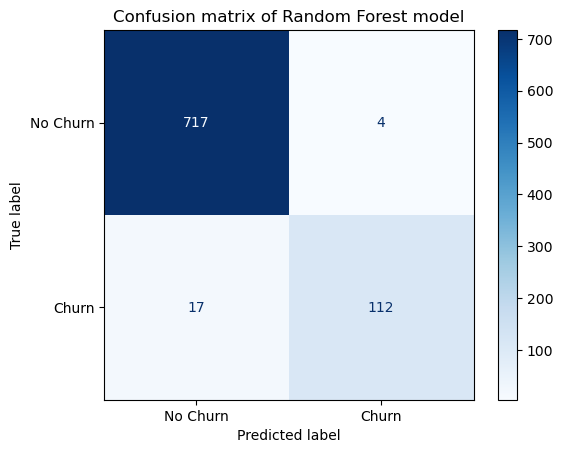

In [28]:
#Confusion matrix of Random Forest
Model_features(X_train, y_train, X_val, y_val, y_pred_rf, rf_model, "Random Forest")

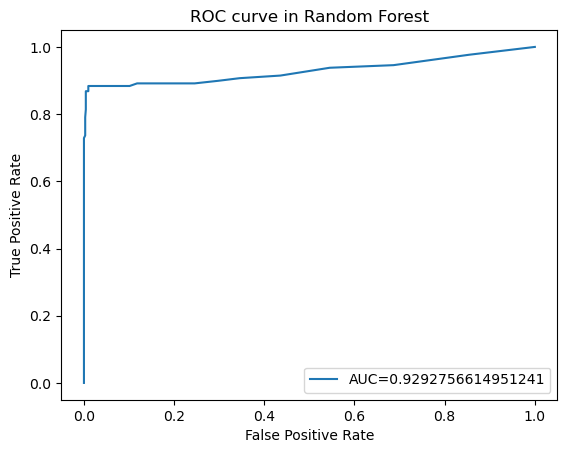

In [29]:
#predict probability of y
y_pred_rf_proba = rf_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_rf_proba)
auc = roc_auc_score(y_val, y_pred_rf_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve in Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
# XGBoost model

xgb = XGBClassifier(max_depth=3)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_val)

Accuracy: 97.53%   Precision Score: 0.9576   Recall Score: 0.8760
F1 Score: 0.9150   Cross Val Score: 0.9751   AUC: 0.9450
              precision    recall  f1-score   support

   Not Churn       0.98      0.99      0.99       721
       Churn       0.96      0.88      0.91       129

    accuracy                           0.98       850
   macro avg       0.97      0.93      0.95       850
weighted avg       0.98      0.98      0.97       850



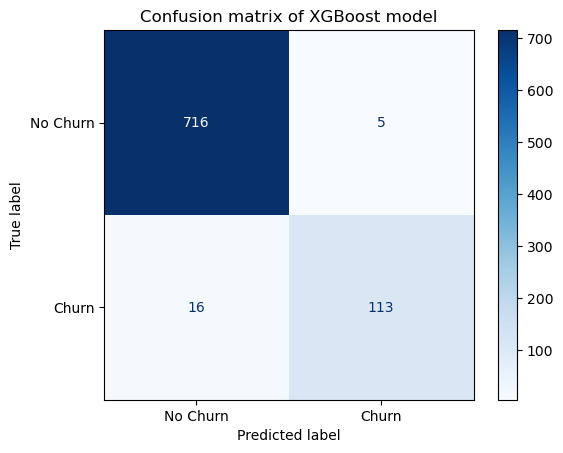

In [31]:
#Confusion matrix of XGBoost

Model_features(X_train, y_train, X_val, y_val, y_pred_xgb, xgb, "XGBoost")

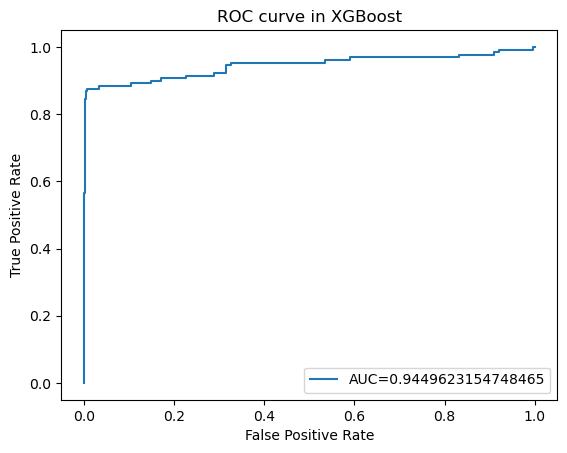

In [32]:
#predict probability of y
y_pred_xgb_proba = xgb.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_xgb_proba)
auc = roc_auc_score(y_val, y_pred_xgb_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve in XGBoost')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [33]:
#comparison table
dict_model = {'Model':model_list, 'Accuracy':accuracy_list, 'Precision':precision_list, 'Recall':recall_list, 'F1_Score':f1_score_list, 'Cross_Val_Score':cross_val_score_list, 'AUC':auc_list}
model_df = pd.DataFrame(dict_model).sort_values(ascending = False , by = 'Accuracy').drop_duplicates()
model_df

,Model,Accuracy,Precision,Recall,F1_Score,Cross_Val_Score,AUC
2,Random Forest,0.9753,0.9655,0.8682,0.9143,0.9736,0.9293
3,XGBoost,0.9753,0.9576,0.8760,0.9150,0.9751,0.9450
1,SVM,0.8882,0.9722,0.2713,0.4242,0.8969,0.8606
0,Logistic Regression,0.8447,0.4400,0.0853,0.1429,0.8595,0.7370


In [34]:
#Combine model with Voting Classifier

from sklearn.ensemble import VotingClassifier
combined_model=VotingClassifier(estimators=[('rf',rf_model), ('XGBoost',xgb)], weights=[0.6,0.4], voting="soft")
combined_model.fit(X_train,y_train)
y_pred_combined=combined_model.predict(X_val)
print(combined_model.score(X_val,y_val))

0.9776470588235294


Accuracy: 97.76%   Precision Score: 0.9741   Recall Score: 0.8760
F1 Score: 0.9224   Cross Val Score: 0.9746   AUC: 0.9351
              precision    recall  f1-score   support

   Not Churn       0.98      1.00      0.99       721
       Churn       0.97      0.88      0.92       129

    accuracy                           0.98       850
   macro avg       0.98      0.94      0.95       850
weighted avg       0.98      0.98      0.98       850



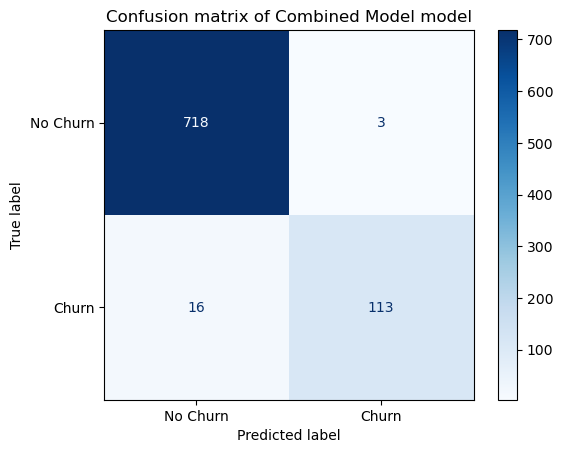

In [35]:
#Confusion matrix of Combined model

Model_features(X_train, y_train, X_val, y_val, y_pred_combined, combined_model, "Combined Model")

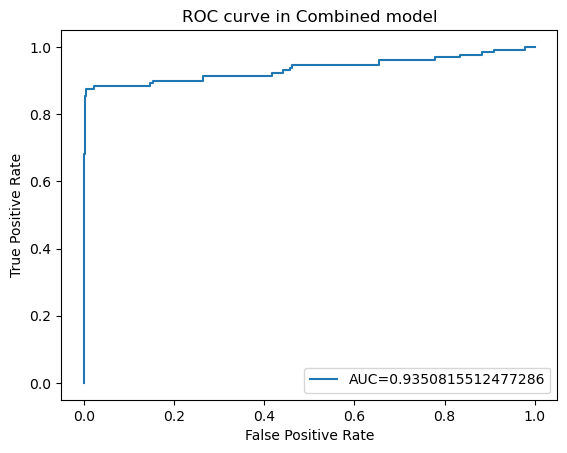

In [65]:
#predict probability of y
y_pred_combined_proba = combined_model.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_combined_proba)
auc = roc_auc_score(y_val, y_pred_combined_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve in Combined model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [38]:
#Loading test.csv into dataframe
df_test=pd.read_csv(os.path.join(INPUT,'test.csv'))
X_test=df_test.copy()
X_test.head(5)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [39]:
#Feature Engineering of test.csv dataframe
X_test.drop(columns=['id' ,'account_length'], inplace=True)

X_test['total_net_minutes'] = X_test['total_day_minutes'] + X_test['total_eve_minutes'] + X_test['total_night_minutes']
X_test['total_net_calls'] = X_test['total_day_calls'] + X_test['total_eve_calls'] + X_test['total_night_calls']
X_test['total_net_charge'] = X_test['total_day_charge'] + X_test['total_eve_charge'] + X_test['total_night_charge']
X_test['voice_mail_plan'] = X_test['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
X_test['international_plan'] = X_test['international_plan'].map({'yes': 1, 'no': 0}) 
X_test.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

# X_test.drop(columns= ['state', 'area_code'], inplace= True)
X_test.area_code = pd.Categorical(X_test.area_code).codes
X_test.state=pd.Categorical(X_test.state).codes

In [46]:
#Run the model on test.csv and save result in output folder
OUTPUT='./output'
if not os.path.exists(OUTPUT):
    os.makedirs(OUTPUT)

y_pred=combined_model.predict(X_test)
df_test['churn']=y_pred
df_test['churn']=df_test['churn'].map({1:'yes',0:'no'})
df_pred=pd.DataFrame({'id': df_test['id'], 'churn': df_test['churn']})
df_pred.to_csv(os.path.join(OUTPUT,'submissionCombinedModel.csv'))